<h1 style='font-size: 35px; color: DarkBlue;'>Conflito israelo-palestino</h1>
<hr>

In [168]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style='darkgrid')
plt.rc('figure', figsize= (11, 5))

In [169]:
dados = pd.read_csv('dados/Palestine_Body_Count.csv')

In [170]:
dados.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.0,DECEMBER,781,NaN,51,8
1,2000.0,NOVEMBER,3838,NaN,112,22
2,2000.0,OCTOBER,5984,NaN,104,10
3,2000.0,SEPTEMBER,NaN,NaN,16,1
4,2001.0,DECEMBER,304,NaN,67,36


<h2>Limpeza do Dataset</h2>
<hr>

<p style= 'font-size: 16px; color: DarkBlue;	'> &diams; Checando variáveis e alterando colunas</p>

In [171]:
dados['Year'].unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021.,   nan])

In [172]:
dados['Israelis Injuries'].isna().sum()

118

In [173]:
dados['Palestinians Injuries'].isna().sum()

55

In [174]:
print('Valores nan "Palestinians Injuries" = ', dados['Palestinians Injuries'].isna().sum())
print('Valores nan "Palestinians Killed" = ', dados['Palestinians Killed'].isna().sum())
print('Valores nan "Israelis Injuries" = ', dados['Israelis Injuries'].isna().sum())
print('Valores nan "Israelis Killed" = ', dados['Israelis Killed'].isna().sum())

Valores nan "Palestinians Injuries" =  55
Valores nan "Palestinians Killed" =  1
Valores nan "Israelis Injuries" =  118
Valores nan "Israelis Killed" =  1


In [175]:
print('Ano minimo : ',dados['Year'].min())
print('Ano minimo : ',dados['Year'].max())

Ano minimo :  2000.0
Ano minimo :  2021.0


In [176]:
dados_ = dados.rename(columns={'Year': 'year', 'Month': 'month', 'Palestinians Injuries': 'palestinians_injuries', 
                    'Israelis Injuries': 'israelis_injuries', 'Palestinians Killed': 'palestinians_killed',
                    'Israelis Killed': 'israelis_killed'})
dados_.head()

,year,month,palestinians_injuries,israelis_injuries,palestinians_killed,israelis_killed
0,2000.0,DECEMBER,781,NaN,51,8
1,2000.0,NOVEMBER,3838,NaN,112,22
2,2000.0,OCTOBER,5984,NaN,104,10
3,2000.0,SEPTEMBER,NaN,NaN,16,1
4,2001.0,DECEMBER,304,NaN,67,36


<p style= 'font-size: 16px; color: DarkBlue;'> &diams; Removendo valores Nan</p>

In [177]:
dados_.fillna(0)

,year,month,palestinians_injuries,israelis_injuries,palestinians_killed,israelis_killed
0,2000.0,DECEMBER,781,0,51,8
1,2000.0,NOVEMBER,3838,0,112,22
2,2000.0,OCTOBER,5984,0,104,10
3,2000.0,SEPTEMBER,0,0,16,1
4,2001.0,DECEMBER,304,0,67,36
...,...,...,...,...,...,...
246,2021.0,MARCH,0,0,4,0
247,2021.0,APRIL,0,0,1,0
248,2021.0,MAY,0,0,26,3
249,0.0,0,0,0,0,0


In [178]:
dados_['israelis_killed'] = dados_['israelis_killed'].str.strip()
dados_['palestinians_killed'] = dados_['palestinians_killed'].str.strip()
dados_['israelis_injuries'] = dados_['israelis_injuries'].str.strip()
dados_['palestinians_injuries'] = dados_['palestinians_injuries'].str.strip()

<p style= 'font-size: 16px; color: DarkBlue;'> &diams; Convertendo <b>Vírgula</b> para <b>Ponto</b> e transformando em inteiro</p>

In [179]:
dados_['israelis_killed'] = dados_['israelis_killed'].str.replace(',', '.')
dados_['palestinians_killed'] = dados_['palestinians_killed'].str.replace(',', '.')
dados_['israelis_injuries'] = dados_['israelis_injuries'].str.replace(',', '.')
dados_['palestinians_injuries'] = dados_['palestinians_injuries'].str.replace(',', '.')

In [180]:
dados_ = dados_.dropna(subset=['year'])
dados_.loc[:, 'year'] = dados_['year'].astype('int64')

C:\Users\henri\AppData\Local\Temp\ipykernel_4676\1562349070.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dados_.loc[:, 'year'] = dados_['year'].astype('int64')


<p style= 'font-size: 16px; color: DarkBlue;'> &diams; Remoção de Strings e Conversão de valores das variáveis para <b>Numérico</b></p>

In [181]:
dados_['month'].unique()

array(['DECEMBER', 'NOVEMBER', 'OCTOBER', 'SEPTEMBER', 'AUGUST', 'JULY',
       'JUNE', 'MAY', 'APRIL', 'MARCH', 'FEBRUARY', 'JANUARY',
       'MAY & JUNE', 'MAY '], dtype=object)

In [182]:
dados_[dados_['palestinians_injuries'] == '(incl. Aug)']

,year,month,palestinians_injuries,israelis_injuries,palestinians_killed,israelis_killed
165,2014,JULY,(incl. Aug),(incl. Aug),1590,59


In [183]:
dados_[dados_['israelis_injuries'] == '(incl. Aug)']

,year,month,palestinians_injuries,israelis_injuries,palestinians_killed,israelis_killed
165,2014,JULY,(incl. Aug),(incl. Aug),1590,59


In [184]:
dados_['palestinians_injuries'].unique()

array(['781', '3838', '5984', nan, '304', '160', '407', '657', '502',
       '394', '319', '932', '715', '927', '598', '471', '185', '264',
       '388', '353', '186', '374', '299', '181', '523', '870', '429',
       '330', '322', '106', '289', '226', '191', '34', '367', '239',
       '303', '379', '244', '292', '161', '98', '343', '579', '287',
       '251', '377', '545', '346', '417', '437', '168', '166', '99', '81',
       '90', '130', '165', '116', '183', '68', '42', '164', '73', '491',
       '180', '196', '266', '799', '198', '257', '254', '203', '194',
       '88', '13720', '127', '152', '135', '154', '67', '162', '281',
       '115', '153', '256', '104', '195', '30', '80', '36', '26', '89',
       '82', '136', '87', '65', '5557', '105', '147', '148', '46', '85',
       '118', '119', '402', '92', '86', '210', '63', '110', '149', '156',
       '159', '397', '193', '204', '143', '2252', '169', '202', '231',
       '703', '404', '60', '320', '137', '138', '124', '656', '493',
     

In [185]:
dados_['israelis_injuries'].unique()

array([nan, '88', '17', '46', '25', '16', '105', '20', '19', '62', '61',
       '12', '30', '24', '10', '41', '26', '14', '78', '47', '6', '13',
       '87', '56', '7', '22', '15', '35', '5', '11', '0', '21', '59', '3',
       '9', '36', '253', '1', '4', '33', '55', '32', '2347',
       '(incl. Aug)', '28', '43', '50', '80', '39', '8', '18', '2', '27',
       '23', '(incl. Jun)', '37'], dtype=object)

In [186]:
dados_['palestinians_injuries'] = dados_['palestinians_injuries'].replace('(incl. Aug)', '0')
dados_['palestinians_injuries'] = dados_['palestinians_injuries'].replace('(incl. Jun)', '0')

dados_['israelis_injuries'] = dados_['israelis_injuries'].replace('(incl. Aug)', '0')
dados_['israelis_injuries'] = dados_['israelis_injuries'].replace('(incl. Jun)', '0')

In [187]:
dados_[dados_['month'] == 'MAY & JUNE']

,year,month,palestinians_injuries,israelis_injuries,palestinians_killed,israelis_killed
203,2017,MAY & JUNE,0,0,6,0


In [188]:
dados_['month'] = dados_['month'].replace('MAY & JUNE', 'MAY')

In [189]:
dados_['israelis_killed'] = pd.to_numeric(dados_['israelis_killed'])
dados_['palestinians_killed'] = pd.to_numeric(dados_['palestinians_killed'])
dados_['israelis_injuries'] = pd.to_numeric(dados_['israelis_injuries'])
dados_['palestinians_injuries'] = pd.to_numeric(dados_['palestinians_injuries'])

<p style= 'font-size: 16px; color: DarkBlue;'> &diams; Testando as variáveis limpadas</p>

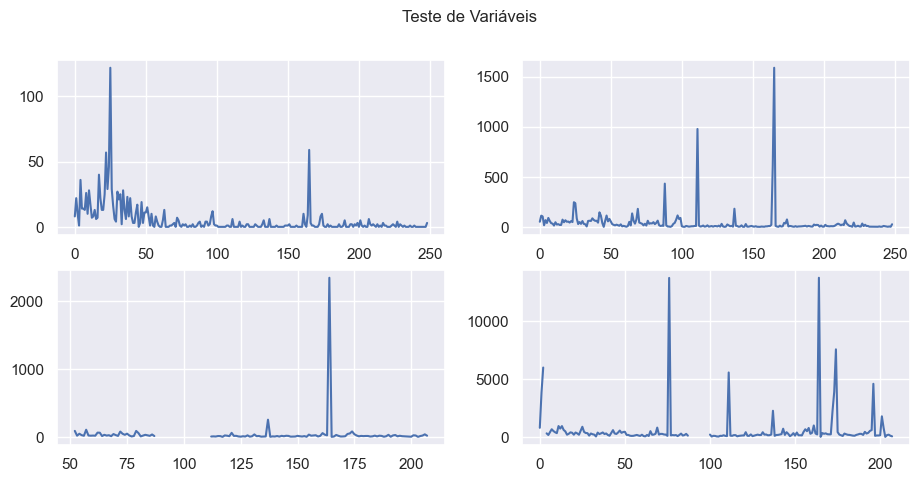

In [190]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2)
(ax1, ax2), (ax3, ax4) = gs.subplots()
fig.suptitle('Teste de Variáveis', fontsize=12)
ax1.plot(dados_['israelis_killed'])
ax2.plot(dados_['palestinians_killed'])
ax3.plot(dados_['israelis_injuries'])
ax4.plot(dados_['palestinians_injuries'])

<h2>Análise Descritiva</h2>
<hr>

In [191]:
selec_00_09 = dados_.query('year <= 2009')

In [192]:
selec_10_21 = dados_.query('year >= 2010')

In [193]:
total_isr = selec_00_09['israelis_killed'].sum()

In [194]:
total_pales = selec_00_09['palestinians_killed'].sum()

In [195]:
total_isr_10_ = selec_10_21['israelis_killed'].sum()

In [196]:
total_pales_10_ = selec_10_21['palestinians_killed'].sum()

In [197]:
data_df = {'Beligerantes': ['Palestinos', 'Israelenses'], 'Total 2000 - 2009': [total_pales, total_isr]}
df_data = pd.DataFrame(data_df)
df_data

,Beligerantes,Total 2000 - 2009
0,Palestinos,6321
1,Israelenses,1072


In [198]:
data_df_ = {'Beligerantes': ['Palestinos', 'Israelenses'], 'Total 2010 - 2021': [total_pales_10_, total_isr_10_]}
df_data_ = pd.DataFrame(data_df_)
df_data_

,Beligerantes,Total 2010 - 2021
0,Palestinos,3679
1,Israelenses,203


Text(0, 0.5, 'Baixas')

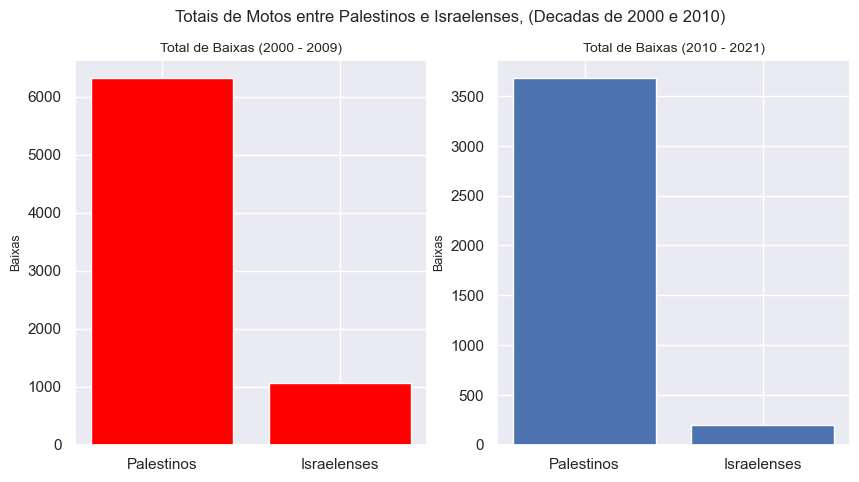

In [199]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Totais de Motos entre Palestinos e Israelenses, (Decadas de 2000 e 2010)", fontsize=12)
ax[0].bar(df_data['Beligerantes'], df_data['Total 2000 - 2009'], color='red')
ax[0].set_title('Total de Baixas (2000 - 2009)', fontsize=10)
ax[0].set_ylabel('Baixas', fontsize=9)
ax[1].bar(df_data_['Beligerantes'], df_data_['Total 2010 - 2021'])
ax[1].set_title('Total de Baixas (2010 - 2021)', fontsize=10)
ax[1].set_ylabel('Baixas', fontsize=9)

In [200]:
dados_[['month', 'palestinians_killed']]

,month,palestinians_killed
0,DECEMBER,51
1,NOVEMBER,112
2,OCTOBER,104
3,SEPTEMBER,16
4,DECEMBER,67
...,...,...
244,JANUARY,4
245,FEBRUARY,1
246,MARCH,4
247,APRIL,1


In [217]:
#data_mes = dados_.groupby('month', axis=0).sum()
#data_mes = data_mes.drop(['year'], axis=1)
#data_mes

In [213]:
data_ano = dados_.groupby('year', axis=0, as_index=False).sum()
data_ano.head()

C:\Users\henri\AppData\Local\Temp\ipykernel_4676\499766958.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_ano = dados_.groupby('year', axis=0, as_index=False).sum()


,year,palestinians_injuries,israelis_injuries,palestinians_killed,israelis_killed
0,2000,10603.0,0.0,283,41
1,2001,6386.0,0.0,470,192
2,2002,4382.0,0.0,1032,419
3,2003,2992.0,0.0,588,185
4,2004,4009.0,0.0,786,104


In [214]:
data_ano['palestinians_injuries'] = data_ano['palestinians_injuries'].astype('int64')
data_ano['israelis_injuries'] = data_ano['israelis_injuries'].astype('int64')

In [216]:
data_ano.head()

,year,palestinians_injuries,israelis_injuries,palestinians_killed,israelis_killed
0,2000,10603,0,283,41
1,2001,6386,0,470,192
2,2002,4382,0,1032,419
3,2003,2992,0,588,185
4,2004,4009,0,786,104


In [235]:
data_ano_ = data_ano.rename(columns={'palestinians_injuries': 'Palestinos-Feridos', 'israelis_injuries': 'Israelenses-Feridos', 
                                    'palestinians_killed': 'Palestinos-Mortos', 'israelis_killed': 'Israelenses-Mortos'})
data_ano_.head(4)

,year,Palestinos-Feridos,Israelenses-Feridos,Palestinos-Mortos,Israelenses-Mortos
0,2000,10603,0,283,41
1,2001,6386,0,470,192
2,2002,4382,0,1032,419
3,2003,2992,0,588,185


<AxesSubplot: title={'center': '\n Feridos Palestinos-Israelenses\n'}, xlabel='Anos'>

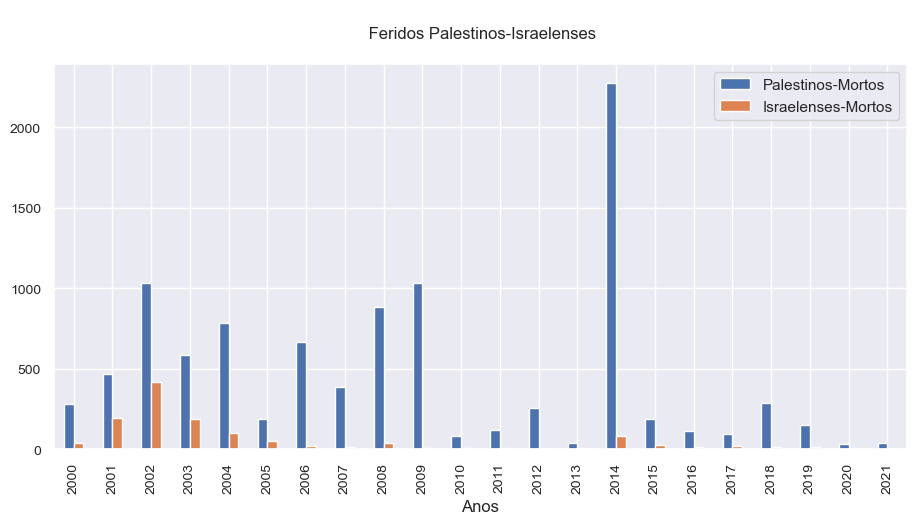

In [248]:
data_ano_.plot.bar(x='year', y=['Palestinos-Mortos', 'Israelenses-Mortos'], figsize=(11, 5), 
                   title='\n Feridos Palestinos-Israelenses\n', xlabel='Anos', fontsize=10)

<AxesSubplot: title={'center': '\n Feridos Palestinos-Israelenses\n'}, xlabel='Anos'>

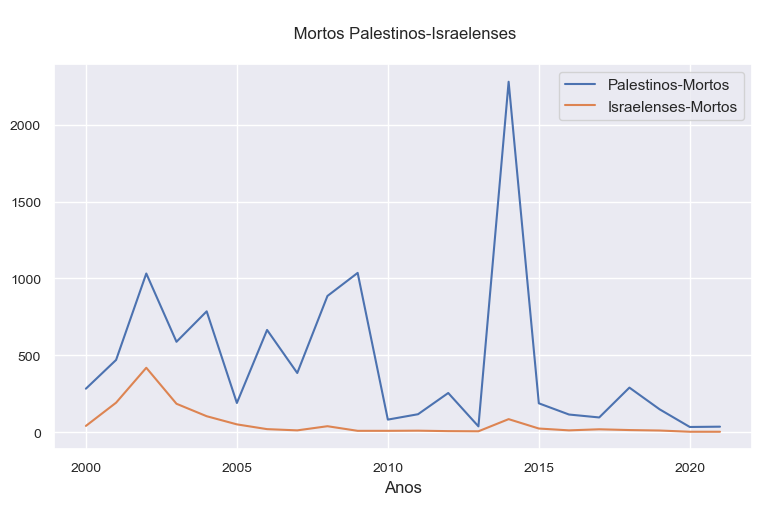

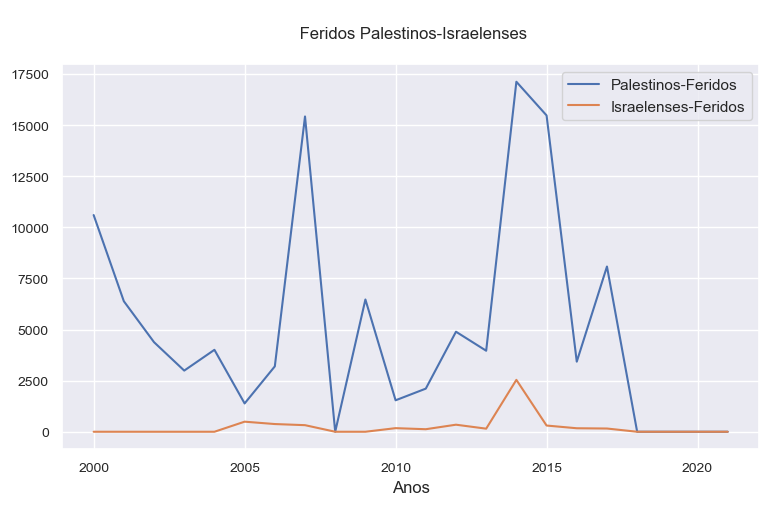

In [250]:
data_ano_.plot(x='year', y=['Palestinos-Mortos', 'Israelenses-Mortos'], figsize=(9, 5), 
                   title='\n Mortos Palestinos-Israelenses\n', xlabel='Anos', fontsize=10)
data_ano_.plot(x='year', y=['Palestinos-Feridos', 'Israelenses-Feridos'], figsize=(9, 5), 
                   title='\n Feridos Palestinos-Israelenses\n', xlabel='Anos', fontsize=10)